<a href="https://colab.research.google.com/github/vardhankumar80/ml_projects/blob/main/customer_churn_prediction_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn-11-1-3


In [292]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [293]:
# List files inside the dataset folder
print(os.listdir(path))

# Load the CSV file (replace with actual filename shown in the folder)
df = pd.read_csv(os.path.join(path, "telco.csv"))

# Explore the dataset
print(df.head())
print(df.info())

# Separate target column before encoding
y = df['Churn Label']
X = df.drop(columns=['Churn Label'])

['telco.csv']
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                  

In [294]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [295]:
#Removing unwanted columns
drop_cols = [
    "Customer ID", "Under 30", "Country", "State", "City", "Zip Code",
    "Latitude", "Longitude", "Population", "Quarter", "Offer",
    "Total Revenue", "Total Refunds", "Customer Status",
    "Churn Score", "Churn Category", "Churn Reason", "Satisfaction Score"
]


df = df.drop(columns=drop_cols, axis=1)

In [296]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,Yes,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,Yes,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,Yes,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,Yes,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,Yes,2793


In [297]:
#Unique Values
for column in df.columns:
  print(column, df[column].unique())

Gender ['Male' 'Female']
Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
Senior Citizen ['Yes' 'No']
Married ['No' 'Yes']
Dependents ['No' 'Yes']
Number of Dependents [0 1 3 2 5 4 6 7 8 9]
Referred a Friend ['No' 'Yes']
Number of Referrals [ 0  1  6  2  4  3  7  5  8  9 10 11]
Tenure in Months [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Phone Service ['No' 'Yes']
Avg Monthly Long Distance Charges [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
Multiple Lines ['No' 'Yes']
Internet Service ['Yes' 'No']
Internet Type ['DSL' 'Fiber Optic' 'Cable' nan]
Avg Monthly GB Download [ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51

In [298]:
#null values
df.isnull().sum()

,0
Gender,0
Age,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Phone Service,0


In [299]:
df["Internet Type"] = df["Internet Type"].fillna("No Internet")
df["Internet Type"].isnull().sum()

np.int64(0)

In [300]:
print(df['Churn Label'].value_counts())

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


#Exploratory Data Analysis(EDA)
- check distributions, outliers, correlations.

In [301]:
df.head()
#Numerical Features -> Age, No of Dependents, Tenure in Months, Monthly Charge, Total Charges, Total Extra Data Charges, Total Long Distance Charges, Satisfaction Score, CLTV


,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,Yes,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,Yes,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,Yes,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,Yes,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,Yes,2793


In [302]:
def plot_histogram(df, col):
  plt.figure(figsize=(4, 3))
  sns.histplot(df[col])
  plt.title(f"Distribution of {col}")

  mean_val = df[col].mean() #Finding Mean
  median_val = df[col].median() #Finding Median

  plt.axvline(mean_val, label="Mean", linestyle="solid", color="blue")
  plt.axvline(median_val, label="Median", linestyle="dashed", color="red")

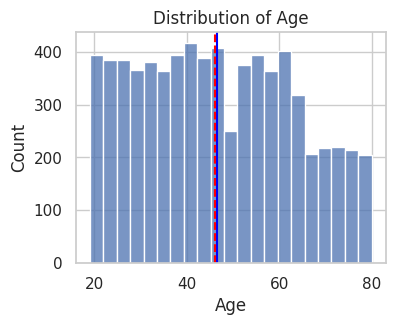

In [303]:
plot_histogram(df, "Age")

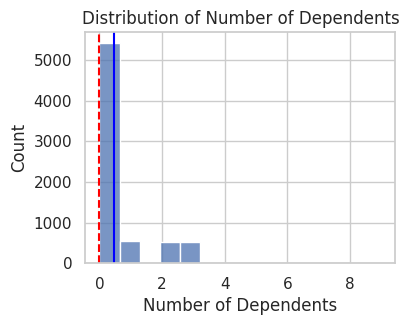

In [304]:
plot_histogram(df, "Number of Dependents")

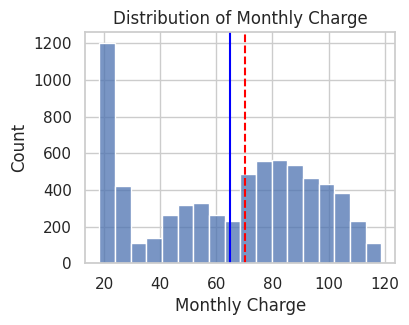

In [305]:
plot_histogram(df, "Monthly Charge")

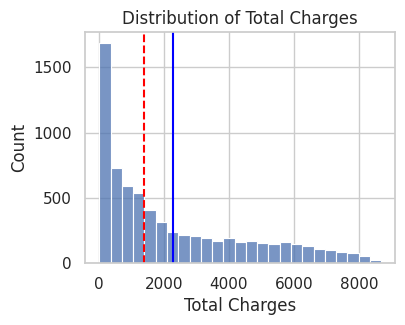

In [306]:
plot_histogram(df, "Total Charges")

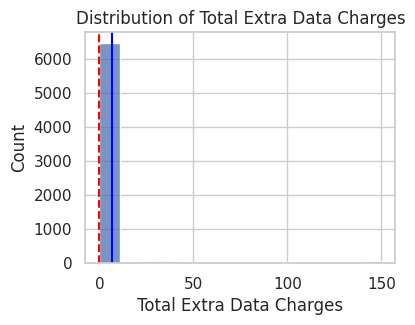

In [307]:
plot_histogram(df, "Total Extra Data Charges")

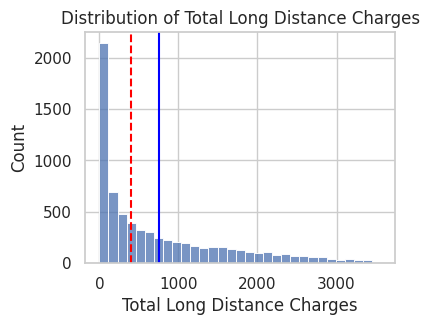

In [308]:
plot_histogram(df, "Total Long Distance Charges")

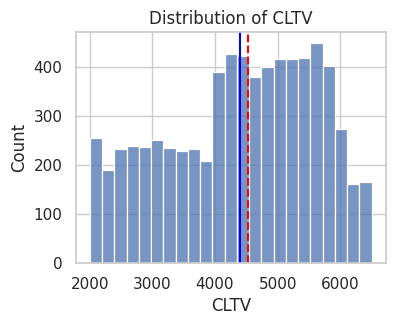

In [309]:
plot_histogram(df, "CLTV")

In [310]:
#To identify outliers
def plot_box_plot(df, col_name):
  plt.figure(figsize=(5,4))
  plt.title(f"Box plot of {col_name}")
  sns.boxplot(y=df[col_name])
  plt.ylabel(col_name)
  plt.show

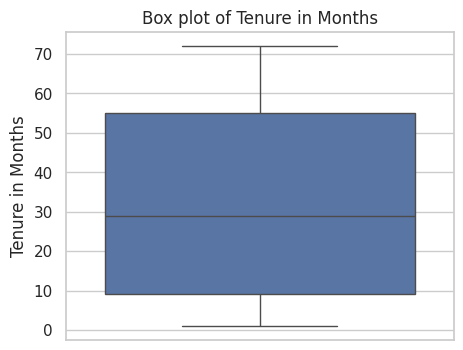

In [311]:
plot_box_plot(df, "Tenure in Months")

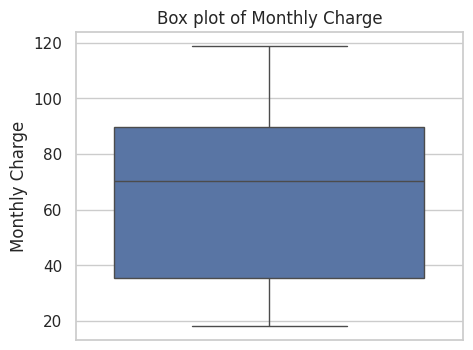

In [312]:
plot_box_plot(df, "Monthly Charge")

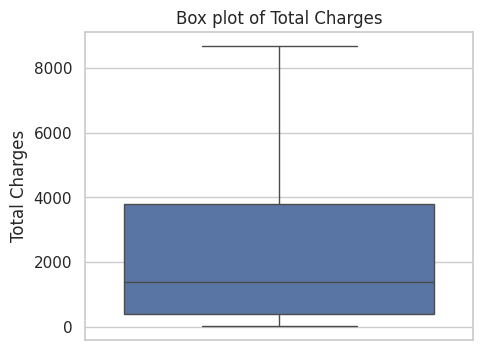

In [313]:
plot_box_plot(df, "Total Charges")

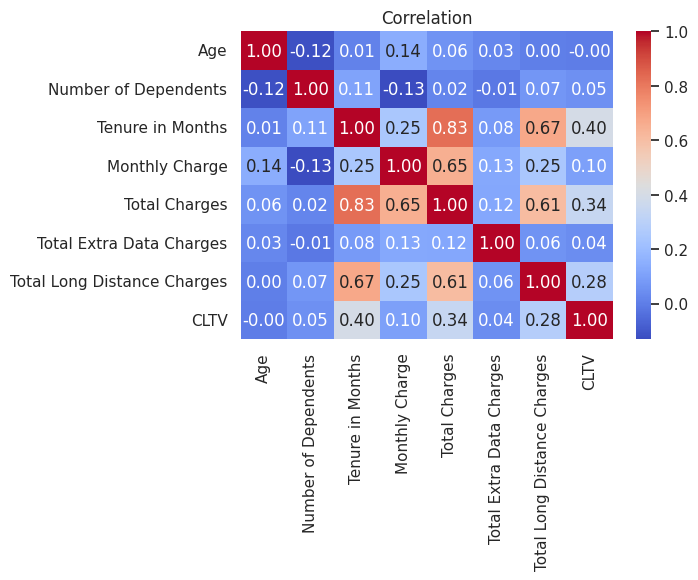

In [314]:
#Correlation - heatmap
plt.figure(figsize=(6,4))
plt.title("Correlation")
sns.heatmap(df[["Age" , "Number of Dependents", "Tenure in Months", "Monthly Charge",
                "Total Charges", "Total Extra Data Charges", "Total Long Distance Charges",
                "CLTV"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [315]:
df.info()
#Categorical Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Multiple Lines                     7043 non-null   objec

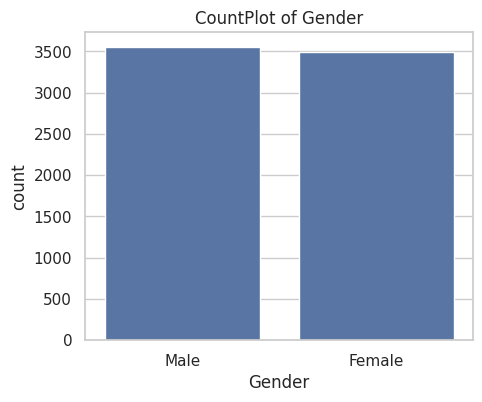

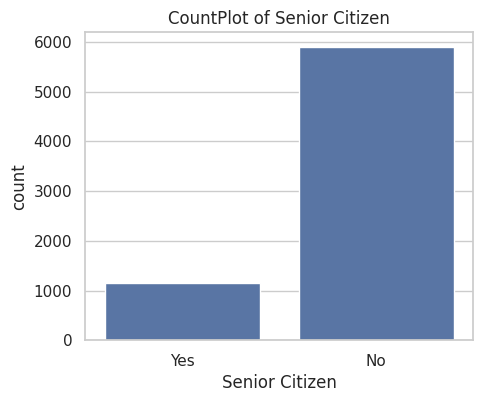

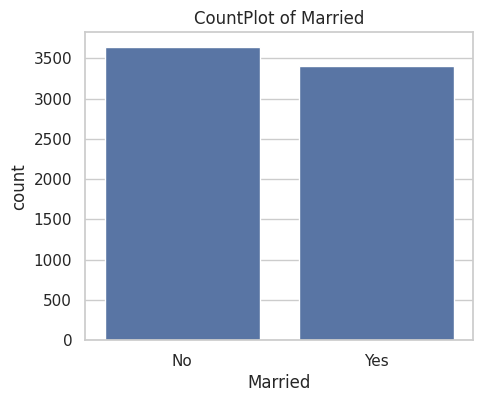

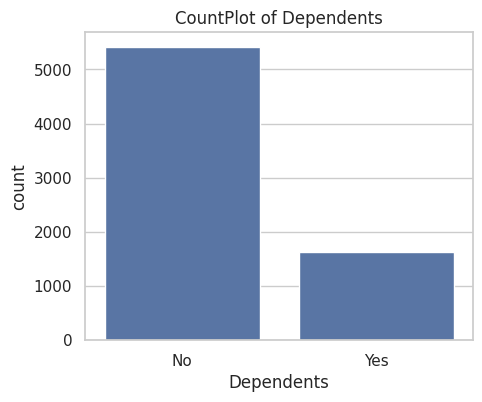

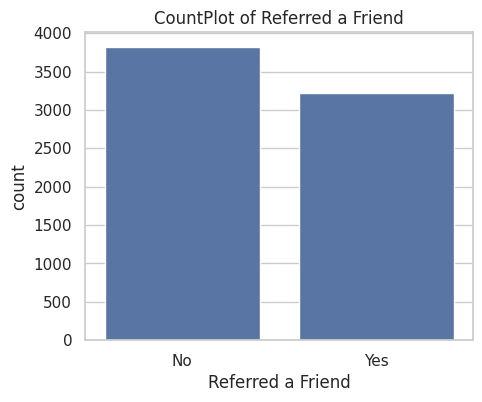

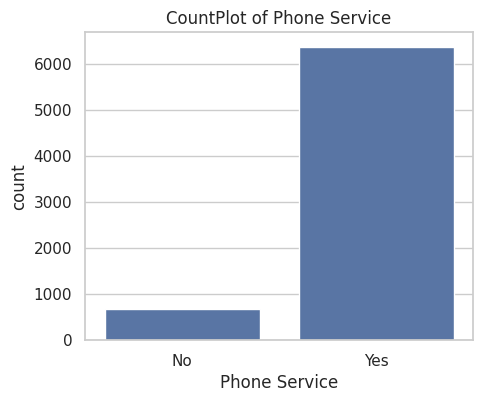

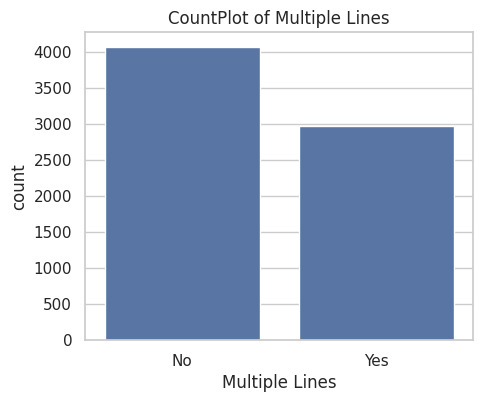

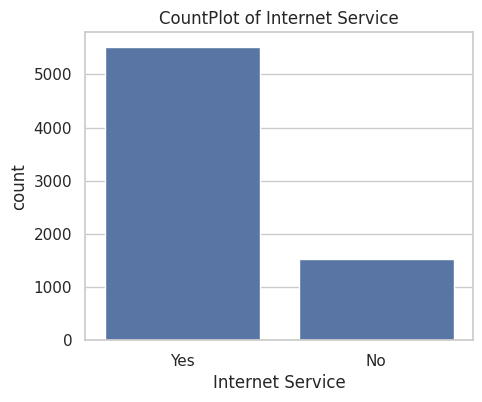

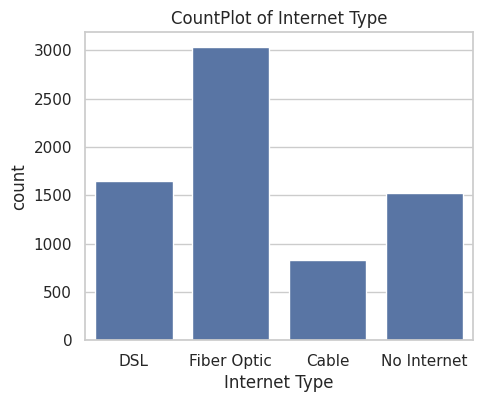

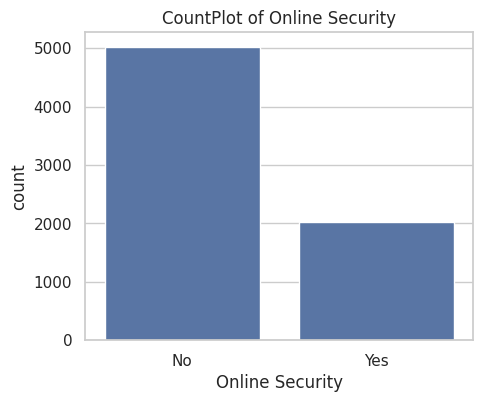

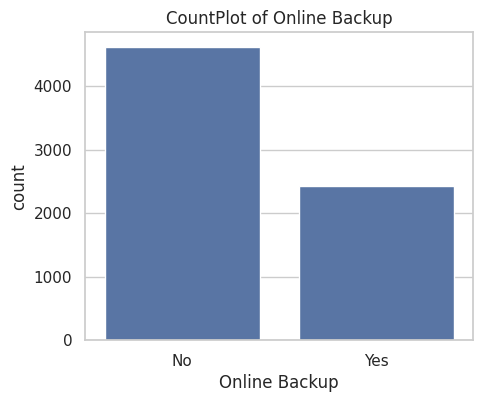

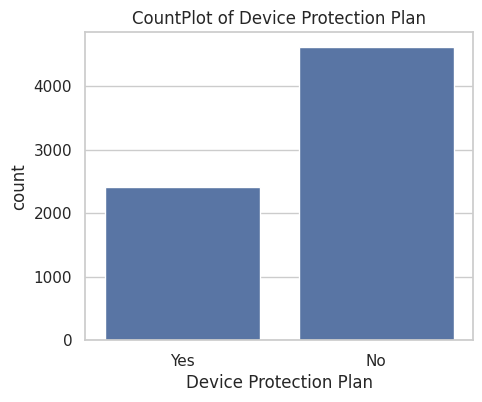

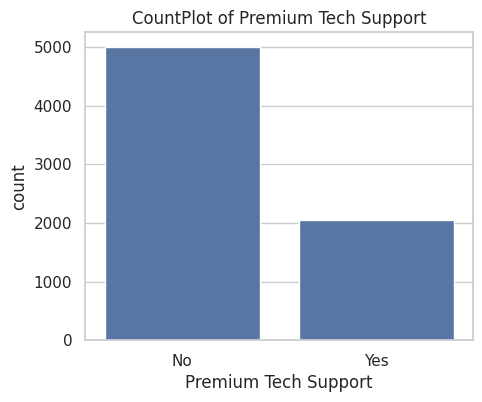

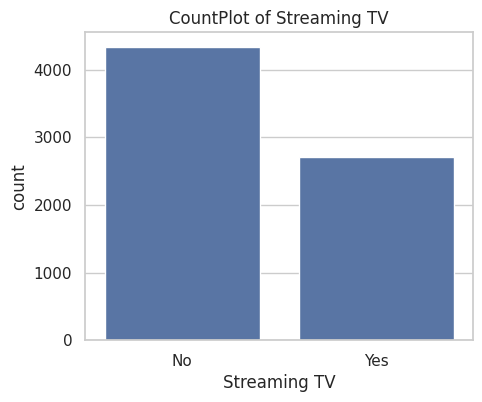

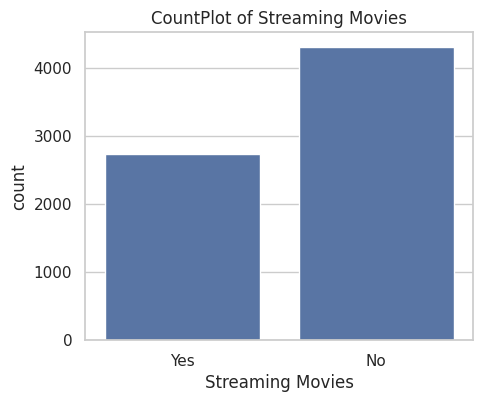

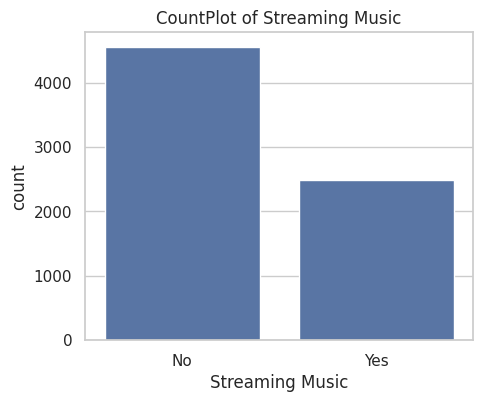

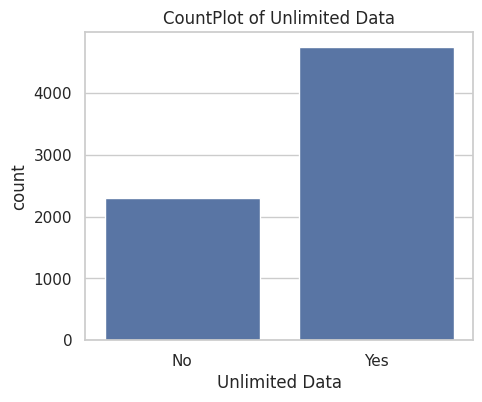

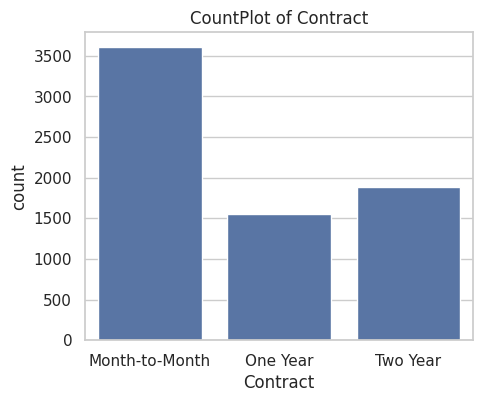

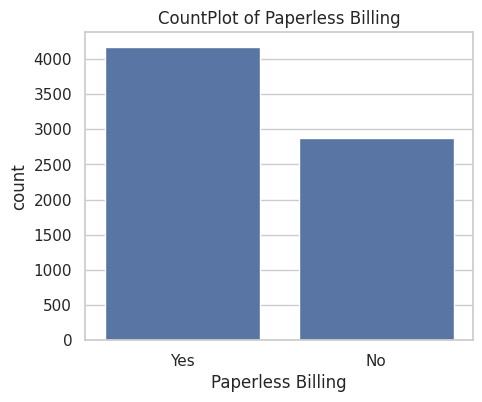

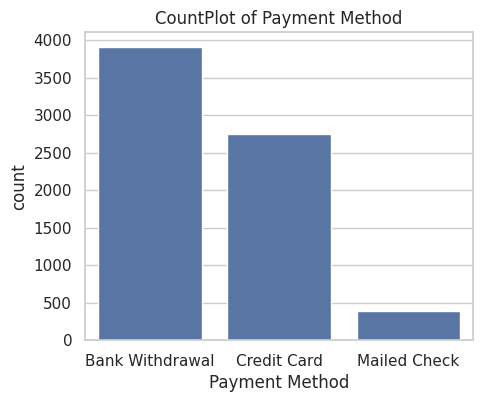

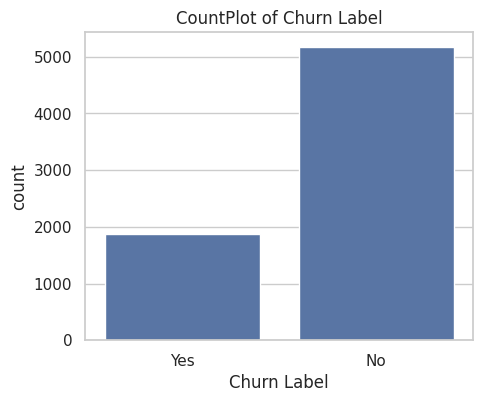

In [316]:
object_cols = df.select_dtypes(include=["object"]).columns.to_list()

for col in object_cols:
  plt.figure(figsize=(5,4))
  plt.title(f"CountPlot of {col}")
  sns.countplot(x=df[col])
  plt.show()

These plots will help you say things like:

“Customers with month-to-month contracts churn far more than those with long-term contracts.”

“Younger customers show slightly higher churn than older ones.”

“Fiber optic internet users churn more compared to DSL users.”

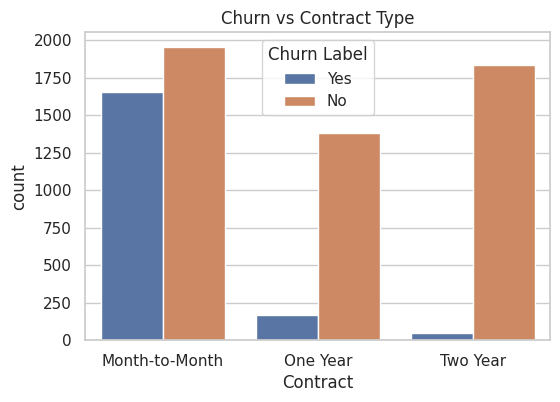

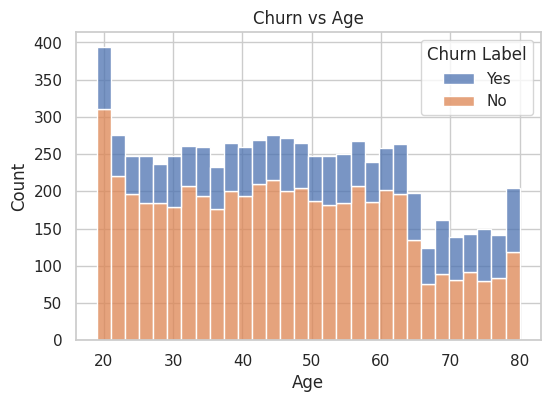

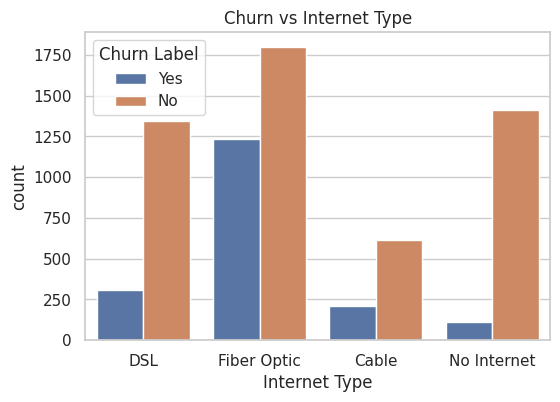

In [318]:
# Set style
sns.set(style="whitegrid")

# Churn vs Contract Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Contract", hue="Churn Label")
plt.title("Churn vs Contract Type")
plt.show()

# Churn vs Age
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Churn Label", multiple="stack", bins=30)
plt.title("Churn vs Age")
plt.show()

# Churn vs Internet Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Internet Type", hue="Churn Label")
plt.title("Churn vs Internet Type")
plt.show()


#Preprocessing

In [321]:
# Encode categorical features only
from sklearn.preprocessing import LabelEncoder
import pickle

object_cols = X.select_dtypes(include='object').columns
encoders = {}

for column in object_cols:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column].astype(str))
    encoders[column] = label_encoder

# Save encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# One-hot encode
X = pd.get_dummies(X, drop_first=True)


In [322]:
#Converting target values to 0 & 1
df['Churn Label'] = df['Churn Label'].replace({"Yes" : 1, "No" : 0})

/tmp/ipython-input-986630220.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn Label'] = df['Churn Label'].replace({"Yes" : 1, "No" : 0})


In [323]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,1,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,1,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,1,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,1,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,1,2793


In [324]:
# Encode categorical features only
from sklearn.preprocessing import LabelEncoder
import pickle

object_cols = X.select_dtypes(include='object').columns
encoders = {}

for column in object_cols:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column].astype(str))
    encoders[column] = label_encoder

# Save encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# One-hot encode
X = pd.get_dummies(X, drop_first=True)


In [325]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,1,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,1,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,1,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,1,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,1,2793


In [326]:
#converting all object columns to numerical
encoders = {} #label encoder

for column in object_cols:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column].astype(str))
  encoders[column] = label_encoder

with open('encoders.pkl','wb') as f:
  pickle.dump(encoders, f)
df = pd.get_dummies(df, drop_first=True)

In [333]:
leakage_cols = [
    "CLTV" ]
x = df.drop(columns=["Churn Label"] + leakage_cols, errors="ignore")
y = df["Churn Label"]


In [334]:
corrs = {}
for col in x.columns:
    if x[col].dtype in [np.int64, np.float64]:
        corrs[col] = np.corrcoef(x[col], y)[0,1]

print(sorted(corrs.items(), key=lambda x: abs(x[1]), reverse=True)[:10])


[('Tenure in Months', np.float64(-0.3528611958713403)), ('Number of Referrals', np.float64(-0.2865404715037923)), ('Total Long Distance Charges', np.float64(-0.2237557540880254)), ('Number of Dependents', np.float64(-0.21878018695662757)), ('Total Charges', np.float64(-0.19854608810394525)), ('Monthly Charge', np.float64(0.19335642223784683)), ('Age', np.float64(0.11575973716171706)), ('Avg Monthly GB Download', np.float64(0.048867552338053295)), ('Avg Monthly Long Distance Charges', np.float64(0.008119528923840769)), ('Total Extra Data Charges', np.float64(0.007139435363900753))]


In [335]:
print(x)

      Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0      78                     0                    0                 1   
1      74                     1                    1                 8   
2      71                     3                    0                18   
3      78                     1                    1                25   
4      80                     1                    1                37   
...   ...                   ...                  ...               ...   
7038   30                     0                    0                72   
7039   38                     2                    1                24   
7040   30                     2                    4                72   
7041   32                     2                    1                11   
7042   44                     0                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00    

In [336]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64


In [337]:
corr = df.corr(numeric_only=True)["Churn Label"].sort_values(ascending=False)
print(corr.head(15))

Churn Label                    1.000000
Internet Type_Fiber Optic      0.279623
Internet Service_Yes           0.227890
Monthly Charge                 0.193356
Paperless Billing_Yes          0.191825
Unlimited Data_Yes             0.166545
Senior Citizen_Yes             0.150889
Age                            0.115760
Streaming TV_Yes               0.063228
Streaming Movies_Yes           0.061382
Payment Method_Mailed Check    0.056348
Avg Monthly GB Download        0.048868
Streaming Music_Yes            0.045587
Multiple Lines_Yes             0.040102
Phone Service_Yes              0.011942
Name: Churn Label, dtype: float64


In [338]:
x.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,78,0,0,1,0.00,8,39.65,39.65,20,0.00,...,False,False,True,False,False,False,False,True,False,False
1,74,1,1,8,48.85,17,80.65,633.30,0,390.80,...,False,False,False,False,True,False,False,True,True,False
2,71,3,0,18,11.33,52,95.45,1752.55,0,203.94,...,False,True,True,True,True,False,False,True,False,False
3,78,1,1,25,19.76,12,98.50,2514.50,0,494.00,...,False,True,True,False,True,False,False,True,False,False
4,80,1,1,37,6.33,14,76.50,2868.15,0,234.21,...,False,False,False,False,True,False,False,True,False,False


In [339]:
#training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print(y_train.shape)

(4930,)


In [ ]:
print(x_test.shape)

(2113, 31)


In [ ]:
print("Full data:", y.value_counts())
print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())

Full data: Churn Label
0    5174
1    1869
Name: count, dtype: int64
Train: Churn Label
0    3622
1    1308
Name: count, dtype: int64
Test: Churn Label
0    1552
1     561
Name: count, dtype: int64


In [341]:
#Resampling the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train, y_train)

In [342]:
print(y_res.value_counts())

Churn Label
0    3622
1    3622
Name: count, dtype: int64


#Training the Model

In [343]:
# Encode categorical features only
from sklearn.preprocessing import LabelEncoder
import pickle

object_cols = X.select_dtypes(include='object').columns
encoders = {}

for column in object_cols:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column].astype(str))
    encoders[column] = label_encoder

# Save encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# One-hot encode
X = pd.get_dummies(X, drop_first=True)


In [344]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [345]:
models = {
    "RandomForest" : RandomForestClassifier(random_state=42, class_weight="balanced"),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42),
}

#Accuracy

In [346]:
#Cross Validation
dict_scores = {}

for model_name, model in models.items():
  print(model_name)
  scores = cross_val_score(model, x, y, cv=5, scoring="accuracy")
  dict_scores[model_name] = scores
  print(f"{model_name} Cross Validation Score: {np.mean(scores): .2f}")

RandomForest
RandomForest Cross Validation Score:  0.80
DecisionTree
DecisionTree Cross Validation Score:  0.72
XGBoost
XGBoost Cross Validation Score:  0.79


In [347]:
dict_scores

{'RandomForest': array([0.73598297, 0.83037615, 0.81405252, 0.81392045, 0.82386364]),
 'DecisionTree': array([0.5351313 , 0.76863023, 0.76650106, 0.76633523, 0.78409091]),
 'XGBoost': array([0.65720369, 0.83037615, 0.8225692 , 0.81463068, 0.82670455])}

#Model Evaluation

In [348]:
#For Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_res, y_res)

RandomForestClassifier(random_state=42)

In [349]:
# Predictions
y_pred = rfc.predict(x_test)

# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8396

Confusion Matrix:
 [[1391  161]
 [ 178  383]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1552
           1       0.70      0.68      0.69       561

    accuracy                           0.84      2113
   macro avg       0.80      0.79      0.79      2113
weighted avg       0.84      0.84      0.84      2113



In [350]:
corr = df.corr(numeric_only=True)["Churn Label"].sort_values(ascending=False)
print(corr)

Churn Label                          1.000000
Internet Type_Fiber Optic            0.279623
Internet Service_Yes                 0.227890
Monthly Charge                       0.193356
Paperless Billing_Yes                0.191825
Unlimited Data_Yes                   0.166545
Senior Citizen_Yes                   0.150889
Age                                  0.115760
Streaming TV_Yes                     0.063228
Streaming Movies_Yes                 0.061382
Payment Method_Mailed Check          0.056348
Avg Monthly GB Download              0.048868
Streaming Music_Yes                  0.045587
Multiple Lines_Yes                   0.040102
Phone Service_Yes                    0.011942
Avg Monthly Long Distance Charges    0.008120
Total Extra Data Charges             0.007139
Gender_Male                         -0.008612
Device Protection Plan_Yes          -0.066160
Online Backup_Yes                   -0.082255
Internet Type_DSL                   -0.099716
CLTV                              

In [351]:
#save the trained model and feature names as a pickle file
model_data = {"model":rfc, "features": x.columns.tolist()}

with open("rfc.pkl", "wb") as f:
  pickle.dump(model_data, f)

#Building Predictive System


In [352]:
with open("rfc.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features"]

print("Model loaded successfully.")
print("Feature names:", feature_names)

Model loaded successfully.
Feature names: ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Gender_Male', 'Senior Citizen_Yes', 'Married_Yes', 'Dependents_Yes', 'Referred a Friend_Yes', 'Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_No Internet', 'Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes', 'Premium Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes', 'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year', 'Paperless Billing_Yes', 'Payment Method_Credit Card', 'Payment Method_Mailed Check']


In [353]:
# Encode categorical features only
from sklearn.preprocessing import LabelEncoder
import pickle

object_cols = X.select_dtypes(include='object').columns
encoders = {}

for column in object_cols:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column].astype(str))
    encoders[column] = label_encoder

# Save encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# One-hot encode
X = pd.get_dummies(X, drop_first=True)


In [355]:
# Build input DataFrame
input_data = {
    "Gender": "Female",
    "Age": 30,
    "Senior Citizen": "No",
    "Married": "No",
    "Dependents": "No",
    "Number of Dependents": 0,
    "Referred a Friend": "No",
    "Number of Referrals": 0,
    "Tenure in Months": 72,
    "Phone Service": "Yes",
    "Contract": "Two Year",
    "Paperless Billing": "Yes",
    "Payment Method": "Bank Withdrawal",
    "Monthly Charge": 21.15,
    "Total Charges": 1419.40,
    "Total Extra Data Charges": 0,
    "Total Long Distance Charges": 1639.44,
}


  # your raw dictionary
input_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# Only apply encoders to columns that exist in both the input_df and the encoders dictionary
for column, encoder in encoders.items():
  input_df[column] = encoder.transform(input_df[column].astype(str))

# One-hot encode the input data
input_df = pd.get_dummies(input_df, drop_first=True)

# Align columns - add missing columns with value 0
missing_cols = set(feature_names) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
# Ensure the order of columns is the same as during training
input_df = input_df[feature_names]

prediction = loaded_model.predict(input_df)
prediction_prob = loaded_model.predict_proba(input_df)

print(prediction)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction probability: {prediction_prob}")

[0]
Prediction: No Churn
Prediction probability: [[0.85 0.15]]


In [357]:
# Initialize model
xgb = XGBClassifier(
    n_estimators=200,       # number of boosting rounds
    learning_rate=0.1,      # step size shrinkage
    max_depth=5,            # depth of trees
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # column sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb.predict(x_test)

# Evaluate
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:47:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.8499763369616659
Confusion Matrix:
 [[1436  116]
 [ 201  360]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1552
           1       0.76      0.64      0.69       561

    accuracy                           0.85      2113
   macro avg       0.82      0.78      0.80      2113
weighted avg       0.85      0.85      0.85      2113



In [359]:
# Example new customer
example = {
    "Gender": "Female",
    "Age": 30,
    "Senior Citizen": "No",
    "Married": "No",
    "Dependents": "No",
    "Number of Dependents": 0,
    "Referred a Friend": "No",
    "Number of Referrals": 0,
    "Tenure in Months": 72,
    "Phone Service": "Yes",
    "Contract": "Two Year",
    "Paperless Billing": "Yes",
    "Payment Method": "Bank Withdrawal",
    "Monthly Charge": 21.15,
    "Total Charges": 1419.40,
    "Total Extra Data Charges": 0,
    "Total Long Distance Charges": 1639.44
}

# Convert dict to DataFrame
example_df = pd.DataFrame([example])

# Apply same preprocessing (encoding, dropping leakage columns, etc.)
example_processed = pd.get_dummies(example_df)
example_processed = example_processed.reindex(columns=x_train.columns, fill_value=0)

# Predict churn
prediction = xgb.predict(example_processed)
probability = xgb.predict_proba(example_processed)[:,1]  # churn probability

print("Prediction:", "Churn" if prediction[0] == 1 else "No Churn")
print("Churn Probability:", probability[0])

Prediction: No Churn
Churn Probability: 0.0042933966
